In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("training")

In [3]:
df1=pd.read_csv("text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [4]:
len(df1)

3321

In [5]:
data=pd.merge(df,df1,on='ID',how='inner')

In [6]:
len(data)

3321

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
import joblib
from tqdm import tqdm

In [8]:
data.columns.values

array(['ID', 'Gene', 'Variation', 'Class', 'TEXT'], dtype=object)

In [9]:
print(data.ID.isnull().any())
print(data.Gene.isnull().any())
print(data.Variation.isnull().any())
print(data.Class.isnull().any())
print(data.TEXT.isnull().any())




False
False
False
False
True


In [10]:
index=list()
for i in range(len(data.TEXT)):
    if(not(isinstance(data.TEXT.iloc[i],str))):
        index.append(i)

In [11]:
print(index)

[1109, 1277, 1407, 1639, 2755]


In [12]:
for i in index:
    print(data.TEXT.iloc[i])

nan
nan
nan
nan
nan


In [14]:
data.TEXT.iloc[1109]

nan

In [18]:
for i in index:
    data.TEXT.iloc[i]=data.Gene.iloc[i]+" "+data.Variation.iloc[i]

C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
data.TEXT[index]

1109                   FANCA S1088F
1277    ARID5B Truncating Mutations
1407                    FGFR3 K508M
1639             FLT1 Amplification
2755                     BRAF G596C
Name: TEXT, dtype: object

In [20]:
text=data.TEXT

In [21]:
for i in text:
    if(not isinstance(i,str)):
        print(i)

In [28]:
import re
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from tqdm import tqdm
for i in tqdm(range(len(text))):
    y=""
    text[i]=re.sub('[^a-zA-Z ]',"",text[i])
    text[i]=text[i].lower()
    word=list(text[i])
    for j in word:
        if(j not in stop_words):
            y=y+j+" ";
    

  0%|                                                                                         | 0/3321 [00:00<?, ?it/s]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|██████████████████████████████████████████████████████████████████████████████| 3321/3321 [11:56<00:00,  4.64it/s]


In [29]:
print(text[100])

signaling by transforming growth factor tgf superfamily ligands to the nucleus is mediated by type i and type ii receptors and the intracellular signal transducers the smads alteration of some of the components of these pathways has been observed in human tumors these alterations can be deletions or mutations or downregulation of components that act positively in the pathway or alternatively amplification or overexpression of inhibitors of the pathways the selection of these alterations during tumor progression and their correlation with clinical outcomes such as survival risk of recurrence after tumor resection or tendency for metastatic spread suggest that many are involved in tumor progression here we review the genetic alterations and epigenetic modifications that occur in different components of the tgf superfamily signaling pathways in human tumors and we discuss their correlation with clinical outcome the evidence suggests that not all alterations of the tgf superfamily signalin

In [31]:
data.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'TEXT'], dtype='object')

In [32]:
data.head(5)

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclindependent kinases cdks regulate a variet...
1,1,CBL,W802*,2,abstract background nonsmall cell lung cance...
2,2,CBL,Q249E,2,abstract background nonsmall cell lung cance...
3,3,CBL,N454D,3,recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,oncogenic mutations in the monomeric casitas b...


In [75]:
y=data.Gene.value_counts()
print(y)

BRCA1      264
TP53       163
EGFR       141
PTEN       126
BRCA2      125
KIT         99
BRAF        93
ALK         69
ERBB2       69
PDGFRA      60
PIK3CA      56
CDKN2A      52
FGFR2       50
FLT3        49
TSC2        47
MTOR        45
KRAS        44
MAP2K1      43
VHL         41
RET         40
FGFR3       39
MLH1        35
MET         33
SMAD4       33
JAK2        33
NOTCH1      31
AKT1        28
PTPN11      26
ABL1        26
ROS1        26
          ... 
PAK1         1
MEN1         1
FGF4         1
AURKB        1
IKBKE        1
FLT1         1
RAD51B       1
RRAS2        1
CDKN2C       1
JUN          1
KDM5A        1
BARD1        1
ERRFI1       1
KLF4         1
GNAQ         1
NCOR1        1
WHSC1        1
SHOC2        1
VEGFA        1
EPCAM        1
HLA-B        1
RICTOR       1
FGF19        1
IL7R         1
ARID5B       1
IKZF1        1
BCL2         1
WHSC1L1      1
FANCC        1
LATS1        1
Name: Gene, Length: 264, dtype: int64


Text(0.5,1,'Histogram')

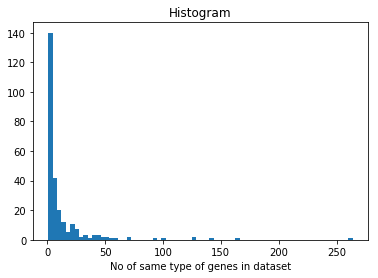

In [76]:
import matplotlib.pyplot as plt
plt.hist(y,bins=70)
plt.xlabel('No of same type of genes in dataset')
plt.title('Histogram')


This means that there are total 264 different kinds of genes in our dataset and most of the genes have been repeted less than 50 times in our dataset and there is one gene which has repeted 264 times. That is the maximum repeteation in our dataset. There are many genes which are present only one times in our dataset

In [77]:
y=data.Variation.value_counts()
print(y)

Truncating Mutations         93
Deletion                     74
Amplification                71
Fusions                      34
Overexpression                6
G12V                          4
T58I                          3
Q61H                          3
Q61R                          3
E17K                          3
Q61L                          3
T286A                         2
E330K                         2
Q61K                          2
A146V                         2
EWSR1-ETV1 Fusion             2
R841K                         2
I31M                          2
G13C                          2
A146T                         2
G12C                          2
Q209L                         2
R170W                         2
G12A                          2
K117N                         2
M1R                           2
R173C                         2
Promoter Hypermethylation     2
E542K                         2
P130S                         2
                             ..
W802*   

Text(0.5,1,'histogram')

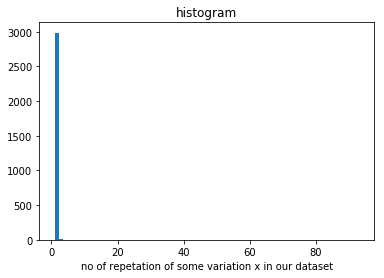

In [78]:
plt.hist(y,bins=70)
plt.xlabel('no of repetation of some variation x in our dataset')
plt.title('histogram')

There are total 2996 different kinds of variation in our dataset. As we can see from histogram that most of the variations have very less repetation or no repetation. Hence we can assume that many variations in our dataset are unique. Truncating Mutation is a variation which has repeted maximum no of times and the repetation is 93. 

In [62]:
y=data.Class.value_counts()
print(y)

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64


Text(0.5,1,'Histogram')

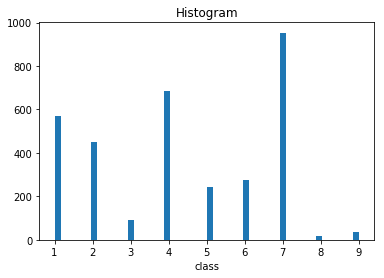

In [80]:
plt.hist(data.Class,bins=50)
plt.xlabel('class')
plt.title("Histogram")

Here we have seen that there are total 9 different class and we can see that some class have repeted many times but some have repeted very less times. Class 3,8,9 have very less repetation and hence they are minority class where as class 1,2,4,7 have repeted large no of times and they belong to majority class. Class 5 and 6 have repeted moderate times. Class 7 have repeted maximum no of times. Class is the output variable. Since there are multiple output variable hence it a multiclass classification problem.

In [81]:
data.columns.values

array(['ID', 'Gene', 'Variation', 'Class', 'TEXT'], dtype=object)

# Featurization

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [100]:

y=data.Class
data=data.drop(['Class'],axis=1)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=42,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.15,random_state=42,stratify=y_train)

In [114]:
print(str(len(X_train))+"     "+str(len(X_train)/len(data))+"%")
print(str(len(X_test))+"    "+str(len(X_test)/len(data))+"%")
print(str(len(X_cv))+"     "+str(len(X_cv)/len(data))+"%")

2257     0.679614573923517%
665    0.20024089129780187%
399     0.12014453477868112%


# Bag of word vectorization of gene feature

In [116]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.Gene)
gene_train=vectorizer.transform(X_train.Gene)
gene_test=vectorizer.transform(X_test.Gene)
gene_cv=vectorizer.transform(X_cv.Gene)

In [124]:
from sklearn.linear_model import LogisticRegression

In [120]:
print(gene_train.toarray().shape)

(2257, 239)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression(class_weight='balanced',C=10)
clf.fit(gene_train,y_train)
gene_predict=clf.predict(gene_cv)
print(accuracy_score(gene_predict,y_cv))

0.48120300751879697


I am getting 48% of the accuracy if i use gene_feature hence it is an important feature.

# Bag of word vectorization of variation feature

In [196]:
vectorizer=CountVectorizer(max_features=500)
vectorizer.fit(X_train.Variation)
variation_train=vectorizer.transform(X_train.Variation)
variation_test=vectorizer.transform(X_test.Variation)
variation_cv=vectorizer.transform(X_cv.Variation)

In [197]:
print(variation_train.toarray().shape)

(2257, 500)


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression(class_weight='balanced',C=10)
clf.fit(variation_train,y_train)
variation_predict=clf.predict(variation_cv)
print(accuracy_score(variation_predict,y_cv))

0.3558897243107769


On using variation feature i am getting an accuracy of 35% hence it is an important feature.

# Bag of word representation for text feature 

In [151]:
vectorizer=CountVectorizer(max_features=5000)
vectorizer.fit(X_train.TEXT)
text_train=vectorizer.transform(X_train.TEXT)
text_test=vectorizer.transform(X_test.TEXT)
text_cv=vectorizer.transform(X_cv.TEXT)

In [152]:
print(text_train.shape)

(2257, 5000)


In [154]:
clf=LogisticRegression(class_weight='balanced',C=1)
clf.fit(text_train,y_train)
text_predict=clf.predict(text_cv)
print(accuracy_score(text_predict,y_cv))

0.6040100250626567


# stacking all the features

In [204]:
from scipy.sparse import hstack

In [205]:
train_x=hstack((gene_train,variation_train,text_train)).toarray()
test_x=hstack((gene_test,variation_test,text_test)).toarray()
cv_x=hstack((gene_cv,variation_cv,text_cv)).toarray()

In [206]:
train_x.shape

(2257, 5739)

In [283]:
alpha=[10**i for i in range(-5,1)]

In [284]:
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1]

In [285]:
train_acc=list()
cv_acc=list()
for i in tqdm(range(len(alpha))):
    clf=LogisticRegression(C=alpha[i],n_jobs=-1,random_state=42,multi_class='ovr')
    clf.fit(train_x,y_train)
    train_predict=clf.predict(train_x)
    cv_predict=clf.predict(cv_x)
    train_acc.append(accuracy_score(y_train,train_predict))
    cv_acc.append(accuracy_score(y_cv,cv_predict))




  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



 17%|██████████████                                                                      | 1/6 [00:03<00:19,  3.85s/it]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



 33%|████████████████████████████                                                        | 2/6 [00:13<00:21,  5.46s/it]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'

In [286]:
print(train_acc)
print(cv_acc)

[0.6583961010190519, 0.7837837837837838, 0.8794860434204697, 0.8910057598582188, 0.8967656180770935, 0.9136021267168808]
[0.5989974937343359, 0.631578947368421, 0.6441102756892231, 0.6240601503759399, 0.6190476190476191, 0.6165413533834586]


In [291]:
import math as mt
log_alpha=list()
for i in alpha:
    log_alpha.append(mt.log10(i))
print(log_alpha)    

[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0]


Text(0,0.5,'Accuracy')

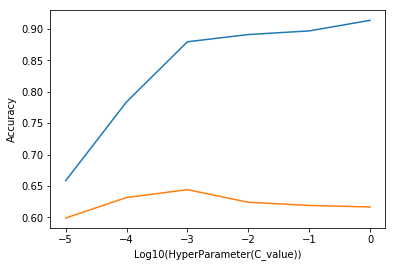

In [292]:
plt.plot(log_alpha,train_acc,label='Train_Accuracy')
plt.plot(log_alpha,cv_acc,label='cv_Accuracy')
plt.xlabel("Log10(HyperParameter(C_value))")
plt.ylabel("Accuracy")

In [293]:
print("Best C-Value: ",alpha[cv_acc.index(max(cv_acc))])

Best C-Value:  0.001


In [296]:
clf=LogisticRegression(C=0.001,random_state=42,multi_class='ovr')
clf.fit(train_x,y_train)
test_predict=clf.predict(test_x)
print(accuracy_score(y_test,test_predict))

0.6090225563909775


In [298]:
import joblib
joblib.dump(clf,'CancerLR')

['CancerLR']

we performed logistic regression on the given dataset and we got an accuracy of 60.9% on test dataset and 88% on train dataset. We performed hyperparameterization and found that best c-value is 1

In [302]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [307]:
k=[1,5,10]
train_acc=list()
cv_acc=list()
for i in tqdm(range(len(k))):
    clf=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k[i]),n_jobs=-1)
    clf.fit(train_x,y_train)
    train_pred=clf.predict(train_x)
    cv_pred=clf.predict(cv_x)
    train_acc.append(accuracy_score(train_pred,y_train))
    cv_acc.append(accuracy_score(cv_pred,y_cv))
    




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\SHUBHA~1\AppData\Local\Temp\joblib_memmaping_pool_12380_1878268158248
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)



 33%|████████████████████████████                                                        | 1/3 [01:39<03:19, 99.96s/it]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\SHUBHA~1\AppData\Local\Temp\joblib_memmaping_pool_12380_1878278470904
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)



 67%|███████████████████████████████████████████████████████▎                           | 2/3 [09:36<03:32, 212.88s/it]C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\exter

In [309]:
print(cv_acc)
print(train_acc)

[0.5839598997493735, 0.5739348370927319, 0.5363408521303258]
[0.9255649091714665, 0.6894107221976075, 0.614975631369074]
